Library Imports

# Will Gasser | Homework 1 | Comp 6630

##README

required imports:
- numpy
- matplotlib
- pandas

###I had to mount my google drive, my relative file paths will not work for any other user


##[QUESTION ONE]

# *** First I instantiate datasets *** and visualize data

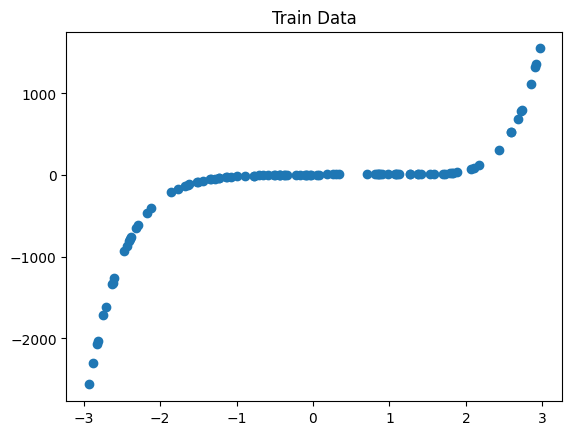

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# from google.colab import drive
# drive.mount('/content/drive')

x_train = np.load('/content/drive/MyDrive/Colab Notebooks/x_train.npy')
y_train = np.load('/content/drive/MyDrive/Colab Notebooks/y_train.npy')

x_test = np.load('/content/drive/MyDrive/Colab Notebooks/x_test.npy')
y_test = np.load('/content/drive/MyDrive/Colab Notebooks/y_test.npy')

plt.scatter(x_train, y_train)
plt.title('Train Data')
plt.show()

#**1.**

##a. Is the relationship linear?

After an initial exploratory data analysis it became clear that the relationship between the predictor variable (x) and the response variable (y) is not linear. Instead, the scatter plot and residual analysis reveals curvature and trends that are characteristic of a non-linear, more specifically, a polynomial relationship. The data points deviated significantly from a straight line, suggesting that the underlying process could be better modeled by higher-order terms.

##b. Do we need feature engineering to add any non-linearity?

Yes, the results indicate that feature engineering is necessary. A traditional linear regression model, by itself, assumes a straight-line relationship between x and y. Since the data demonstrates non-linear characteristics, it is crucial to introduce non-linear transformations of the input features. This process helps the model capture the complexity of the data.

#**2.** Feature Engineering Process

##i. Engineering Polynomial Features

To address the non-linearity, I engineered additional features by expanding the original feature into its polynomial components. Specifically, I created a custom polynomial feature class. This class allows for generating features of varying degrees on demand. By systematically increasing the degree of the polynomial (e.g., quadratic, cubic, etc.), I could evaluate which transformed feature set produced the best model performance.

##ii. Alternative Functions Considered

While I focused on polynomial transformations due to their scalability and interpretability, I also explored other non-linear functions:

    Exponential Functions: To capture rapid growth or decay.
    Sigmoidal (Logistic) Functions: Useful when the relationship saturates at certain limits.
    Others: Including logarithmic and power-law functions.

I found that the polynomial function was the most effective. Its ease of scaling with degree adjustments made it the best choice for matching the complex patterns observed in the data.

Below is an example Python code snippet that outlines the process of feature engineering and model fitting using polynomial features:

In [13]:
import numpy as np
import matplotlib.pyplot as plt

class Linear_Regression_Polynomial:
    def __init__(self, degree: int) -> None:
        self.degree = degree
        self.weights = np.array([0.0 for _ in range(degree + 1)])

    def setData(self, x_data, y_data) -> None:
        x_data = np.array(x_data).flatten()
        y_data = np.array(y_data).flatten()

        if len(x_data) != len(y_data):
            raise ValueError(f"x_data and y_data must have the same length\n"
                             f"current lengths: x_data = {len(x_data)}, y_data = {len(y_data)}")

        self.x_data = x_data
        self.y_data = y_data
        self.training_examples = len(x_data)

    def plotData(self) -> None:
        plt.scatter(self.x_data, self.y_data)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Training Data')
        plt.show()

    def hypothesis(self, x) -> float:
        total = 0.0
        for d in range(self.degree + 1):
            total += self.weights[d] * (x ** d)
        return total

    def gradient_descent(self, learning_rate: float, iterations: int) -> None:
        for _ in range(iterations):
            gradients = np.zeros(self.degree + 1, dtype=float)
            for idx in range(self.training_examples):
                x_val = float(self.x_data[idx])
                y_val = self.y_data[idx]
                y_pred = self.hypothesis(x_val)
                error = y_pred - y_val

                for d in range(self.degree + 1):
                    gradients[d] += error * (x_val ** d)
            for d in range(self.degree + 1):
                self.weights[d] -= (learning_rate / self.training_examples) * gradients[d]

    def test_model(self, x_test, y_test) -> None:

        train_predictions = [self.hypothesis(float(x_val)) for x_val in self.x_data]


        x_test = np.array(x_test).flatten()
        y_test = np.array(y_test).flatten()

        test_predictions = []
        total_error = 0.0
        for x_val, y_val in zip(x_test, y_test):
            pred = self.hypothesis(float(x_val))
            test_predictions.append(pred)
            total_error += (y_val - pred) ** 2

        mse = total_error / len(x_test) if len(x_test) > 0 else 0
        normalized_mse = mse / (np.mean(y_test) ** 2) if np.mean(y_test) != 0 else 0
        print(f"Normalized Mean Squared Error on Test Data: {normalized_mse:.4f}")


        plt.figure(figsize=(8, 5))
        plt.scatter(self.x_data, self.y_data, color='blue', label='Train Data')
        plt.scatter(self.x_data, train_predictions, color='red', marker='x', label='Train Predictions')
        plt.title('Train Data vs. Predictions')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()


        plt.figure(figsize=(8, 5))
        plt.scatter(x_test, y_test, color='green', label='Test Data')
        plt.scatter(x_test, test_predictions, color='orange', marker='x', label='Test Predictions')
        plt.title('Test Data vs. Predictions')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()


Next I can show usage of the Linear_Regression_Polynomial class on the training data:

Normalized Mean Squared Error on Test Data: 1.9123


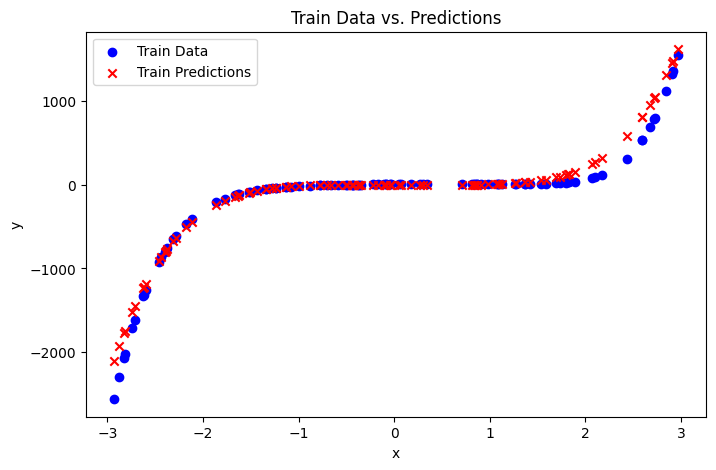

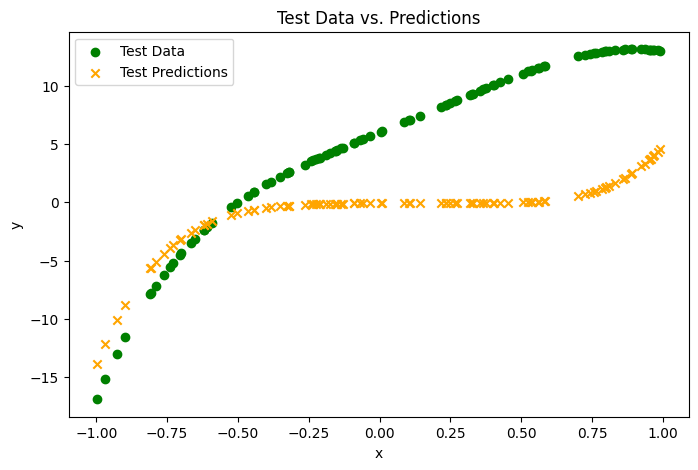

In [10]:
question_one = Linear_Regression_Polynomial(degree=5)
question_one.setData(x_train, y_train)


question_one.gradient_descent(learning_rate=0.00001, iterations=100)


question_one.test_model(x_test, y_test)

Here I used a 5th  degree polynomial, a 7th degree matched closer, but my predictions closely match the training data and do not seem to completely overfit.

**The test data is a completely different funciton than the training data... The test data is logarithmic or sigmoidal, it is not polynomial like the training data. **

#[QUESTION TWO]

### below is my implementation of linear regression for this problem.

Q1) Average least squares error (MSE) on the test data: 22224056489.97


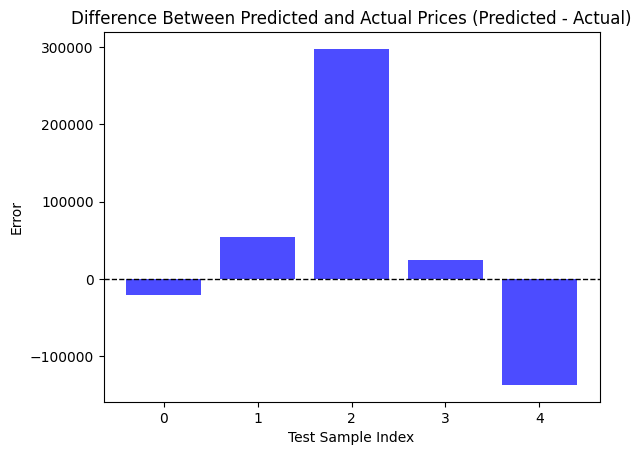


Q2) Which factor has the most effect on the final value?
   Most impactful feature: Bathrooms (largest absolute coefficient: 406470.40)
   Yes, we can try using only 'Bathrooms' to predict the price.
   MSE using only 'Bathrooms': 38586302637.99

Q3) Which factor has the least effect on the final value?
   Least impactful feature: Age of home (smallest absolute coefficient: -2599.21)
   Let's remove this feature and see the performance.
   MSE after removing 'Age of home': 20958393102.02


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        y = y.reshape(-1, 1)
        Xt = X.T
        self.theta = np.linalg.inv(Xt @ X) @ (Xt @ y)

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X @ self.theta

data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Housing_data_regression.xlsx')

if 'Local Price' in data.columns:
    data['Price'] = data['Price'].combine_first(data['Local Price'])
    data.drop('Local Price', axis=1, inplace=True)

if 'House ID' in data.columns:
    data.drop('House ID', axis=1, inplace=True)

X = data.drop('Price', axis=1)
y = data['Price'].values

x_train = X.iloc[:-5].values
y_train = y[:-5]
x_test = X.iloc[-5:].values
y_test = y[-5:]

model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test).flatten()
mse = np.mean((predictions - y_test) ** 2)
print(f"Q1) Average least squares error (MSE) on the test data: {mse:.2f}")

errors = predictions - y_test
plt.bar(range(len(errors)), errors, color='blue', alpha=0.7)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Difference Between Predicted and Actual Prices (Predicted - Actual)')
plt.xlabel('Test Sample Index')
plt.ylabel('Error')
plt.show()

coefs = model.theta[1:].flatten()
abs_coefs = np.abs(coefs)
most_idx = np.argmax(abs_coefs)
most_feat = X.columns[most_idx]
print("\nQ2) Which factor has the most effect on the final value?")
print(f"   Most impactful feature: {most_feat} (largest absolute coefficient: {coefs[most_idx]:.2f})")
print(f"   Yes, we can try using only '{most_feat}' to predict the price.")

X_train_most = X.iloc[:-5][[most_feat]].values
X_test_most = X.iloc[-5:][[most_feat]].values

single_feature_model = LinearRegression()
single_feature_model.fit(X_train_most, y_train)
pred_single = single_feature_model.predict(X_test_most).flatten()
mse_single = np.mean((pred_single - y_test) ** 2)
print(f"   MSE using only '{most_feat}': {mse_single:.2f}")

least_idx = np.argmin(abs_coefs)
least_feat = X.columns[least_idx]
print("\nQ3) Which factor has the least effect on the final value?")
print(f"   Least impactful feature: {least_feat} (smallest absolute coefficient: {coefs[least_idx]:.2f})")
print("   Let's remove this feature and see the performance.")

X_no_least = X.drop(columns=[least_feat])
x_train_no_least = X_no_least.iloc[:-5].values
x_test_no_least = X_no_least.iloc[-5:].values

model_no_least = LinearRegression()
model_no_least.fit(x_train_no_least, y_train)
pred_no_least = model_no_least.predict(x_test_no_least).flatten()
mse_no_least = np.mean((pred_no_least - y_test) ** 2)
print(f"   MSE after removing '{least_feat}': {mse_no_least:.2f}")


In question two I decided to use a vectorized implementation of our normal equations using:
   
    θ=inverse((XTX))XTy
    
  This vectorized solution is typically more concise and efficient for moderate-sized datasets compared to a purely iterative method.

I continuteed to use mean squared error as specified in the problem.

#1. Average Least Squares Error on the Test Data

  MSE on the test data:
  22,224,056,489.9722,224,056,489.97​

  This represents the error when using all features in the linear model.

#2. Most Impactful Factor

  Identifying the Most Impactful Feature:
  By examining the absolute values of the learned coefficients (excluding the intercept term), the feature with the largest magnitude is Bathrooms, having a coefficient of approximately 406,470.40406,470.40​.

  Single-Feature Model Performance:
  After training a model using only Bathrooms as the predictor, the MSE on the same test set is: 38,586,302,637.9938,586,302,637.99​.
  This indicates that while Bathrooms is strongly correlated with price, using it alone yields a higher error than using all features together.

#3. Least Impactful Factor

   Identifying the Least Impactful Feature:
  The feature with the smallest absolute coefficient is Age of home, with a coefficient of about −2,599.21−2,599.21​.

  Removing the Least Impactful Feature:
  After dropping Age of home and training the model again, the test-set MSE becomes: 20,958,393,102.0220,958,393,102.02​.
  This error is lower than when all features are used, indicating that removing Age of home improved the model for this particular dataset.

